In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./car details v4.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
df['Model'].value_counts()

X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
                                   ..
XF R 5.0 V8 Supercharged            1
Pajero SFX 2.8                      1
Etios G                             1
Marazzo M6 Plus 8 STR               1
Figo Duratec Petrol ZXI 1.2         1
Name: Model, Length: 1050, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

There are too many features with object datatype, so let's see how many unique values do we have in object data types features

In [5]:
df.isnull().mean() * 100

Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Max Power             3.885381
Max Torque            3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
dtype: float64

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [7]:
df = df.dropna(axis=0)

In [8]:
# function to count unique values in object column
def object_count_unique(df):
    for column in df.columns:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].nunique()} | dtype: {df[column].dtype}')

In [9]:
object_count_unique(df)

Make: 32 | dtype: object
Model: 955 | dtype: object
Fuel Type: 7 | dtype: object
Transmission: 2 | dtype: object
Location: 75 | dtype: object
Color: 16 | dtype: object
Owner: 4 | dtype: object
Seller Type: 3 | dtype: object
Engine: 104 | dtype: object
Max Power: 309 | dtype: object
Max Torque: 264 | dtype: object
Drivetrain: 3 | dtype: object


In [10]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [11]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'CNG + CNG', 'LPG', 'Hybrid',
       'Petrol + CNG'], dtype=object)

In [12]:
new = df[['Max Power', 'Max Torque']]

In [13]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [14]:
pattern_pw = r'(\d+)(?:\s*bhp)?\s*@\s*(\d+)(?:\s*rpm)?'
df[['Power', 'Power RPM']] = df['Max Power'].str.extract(pattern_pw).astype(float)

In [15]:
pattern_trq = r'(\d+)(?:\s*Nm)?\s*@\s*(\d+)(?:\s*rpm)?'
df[['Torque', 'Torque RPM']] = df['Max Torque'].str.extract(pattern_trq).astype(float)

In [16]:
df = df.drop(columns=['Max Power', 'Max Torque'], axis=1)

In [17]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Power                 0
Power RPM             0
Torque                0
Torque RPM            0
dtype: int64

In [18]:
df[df.isna().any(axis=1)]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM


In [19]:
object_count_unique(df)

Make: 32 | dtype: object
Model: 955 | dtype: object
Fuel Type: 7 | dtype: object
Transmission: 2 | dtype: object
Location: 75 | dtype: object
Color: 16 | dtype: object
Owner: 4 | dtype: object
Seller Type: 3 | dtype: object
Engine: 104 | dtype: object
Drivetrain: 3 | dtype: object


In [20]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [21]:
obj_column = df.select_dtypes(include=['object']).columns.tolist()

In [22]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    # Initialize a LabelEncoder
    label_encoder = LabelEncoder()
    
    # List of object type columns with missing values
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Encode each object column
    for column in object_columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df

In [23]:
encoded_df = encode_categorical_columns(df)

In [24]:
encoded_df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power,Power RPM,Torque,Torque RPM
0,7,92,505000,2017,87150,5,1,56,7,0,...,1,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0,4500.0
1,18,731,450000,2014,75000,2,1,40,14,1,...,1,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0,2000.0
2,8,940,220000,2011,67000,5,1,39,8,0,...,1,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,7619.0,4000.0
3,29,453,799000,2019,37500,5,1,41,12,0,...,1,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0,4200.0
4,29,503,1950000,2018,69000,2,1,45,7,0,...,2,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,18,641,245000,2014,79000,5,1,20,14,1,...,1,3775.0,1680.0,1620.0,5.0,43.0,85.0,6000.0,113.0,4500.0
2054,17,914,850000,2016,90300,2,1,66,14,0,...,1,4585.0,1890.0,1785.0,7.0,70.0,138.0,3750.0,330.0,1600.0
2055,8,379,275000,2014,83000,5,1,1,14,1,...,1,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0,4000.0
2056,6,418,240000,2013,73000,5,1,67,13,0,...,1,3795.0,1680.0,1427.0,5.0,45.0,70.0,6250.0,102.0,4000.0


In [25]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Power', 'Power RPM', 'Torque', 'Torque RPM'],
      dtype='object')

In [26]:
X = encoded_df.drop(columns=['Price'], axis=1)
y = np.log1p(encoded_df['Price'])

<Axes: >

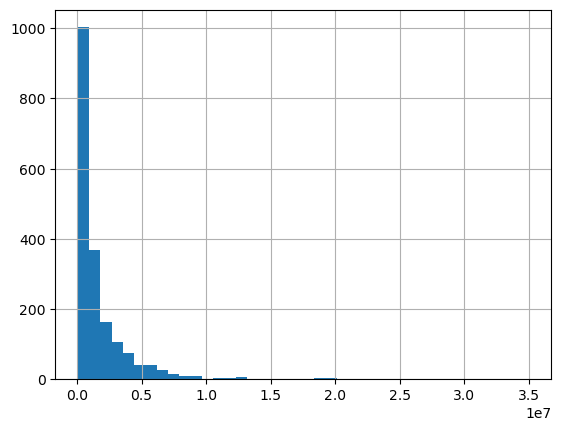

In [27]:
encoded_df['Price'].hist(bins=40)

<Axes: >

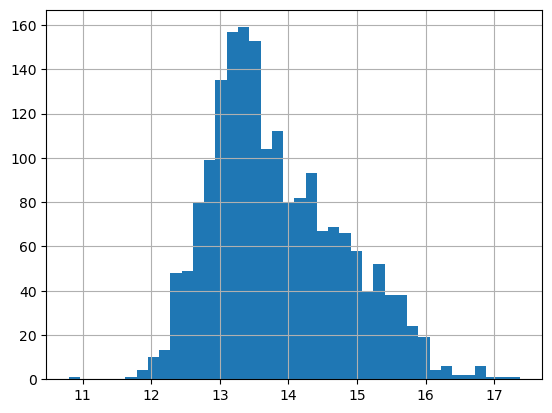

In [28]:
y.hist(bins=40)

In [29]:
print('Data Distribution of Price')
skew = encoded_df['Price'].skew()
kurt = encoded_df['Price'].kurt()
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

Data Distribution of Price
skewness: 4.937428915019126
kurtosis: 40.03794809895493


In [30]:
print('Data Distribution of Price after log')
skew = y.skew()
kurt = y.kurt()
print(f'skewness: {skew}')
print(f'kurtosis: {kurt}')

Data Distribution of Price after log
skewness: 0.5675368200020122
kurtosis: -0.141564877207772


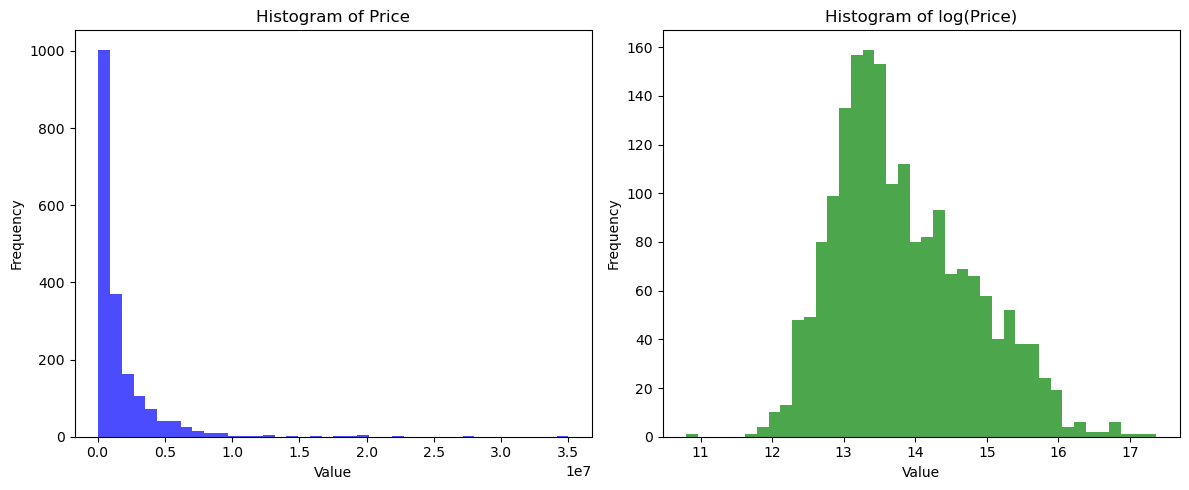

In [31]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# First subplot: Histogram of y_train
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(encoded_df['Price'], bins=40, color='blue', alpha=0.7)
plt.title("Histogram of Price")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Second subplot: Histogram of train['LogPrice']
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(y, bins=40, color='green', alpha=0.7)
plt.title("Histogram of log(Price)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [34]:
from pycaret import *
from pycaret.regression import *

In [35]:
exp_1 = setup(data=X, target=y)
best_model = compare_models()

,Description,Value
0,Session id,3446
1,Target,Price
2,Target type,Regression
3,Original data shape,"(1874, 22)"
4,Transformed data shape,"(1874, 22)"
5,Transformed train set shape,"(1311, 22)"
6,Transformed test set shape,"(563, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.1347,0.0431,0.2041,0.9506,0.0136,0.0097,0.0220
et,Extra Trees Regressor,0.1407,0.0438,0.2070,0.9500,0.0139,0.0102,0.0450
gbr,Gradient Boosting Regressor,0.1458,0.0451,0.2104,0.9487,0.0140,0.0105,0.0280
rf,Random Forest Regressor,0.1473,0.0505,0.2225,0.9429,0.0148,0.0106,0.0610
lr,Linear Regression,0.1983,0.0713,0.2665,0.9180,0.0179,0.0143,0.1470
ridge,Ridge Regression,0.1982,0.0713,0.2665,0.9180,0.0179,0.0143,0.0040
br,Bayesian Ridge,0.1976,0.0715,0.2668,0.9179,0.0179,0.0143,0.0040
ada,AdaBoost Regressor,0.2242,0.0917,0.3017,0.8962,0.0201,0.0162,0.0200
dt,Decision Tree Regressor,0.2060,0.0950,0.3044,0.8932,0.0203,0.0149,0.0070
en,Elastic Net,0.2567,0.1478,0.3727,0.8273,0.0261,0.0185,0.0040


In [36]:
import xgboost as xgb

In [37]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
# Prepare evaluation data sets
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the regressor to the training set and evaluate on both training and testing sets
xg_reg.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict the labels of the test set
y_pred = xg_reg.predict(X_test)

# Model Evaluatoin
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.14202545272955186
Mean Squared Error: 0.05342336170257264
R-squared: 0.9502429029177799


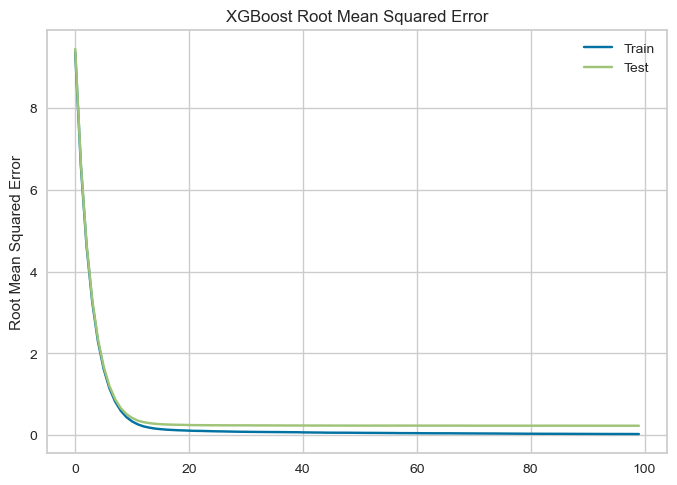

In [39]:
# Retrieve evaluation results
results = xg_reg.evals_result()

epochs = len(results['validation_0']['mae'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('Root Mean Squared Error')
plt.title('XGBoost Root Mean Squared Error')
plt.show()


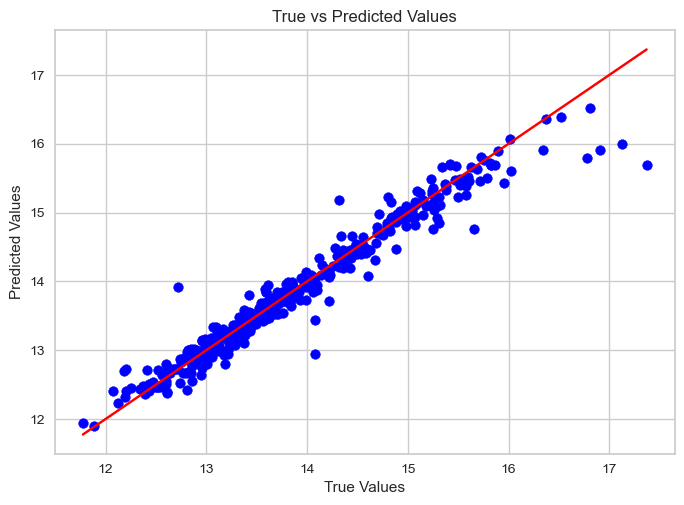

In [40]:
import matplotlib.pyplot as plt

# Scatter plot of true vs. predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


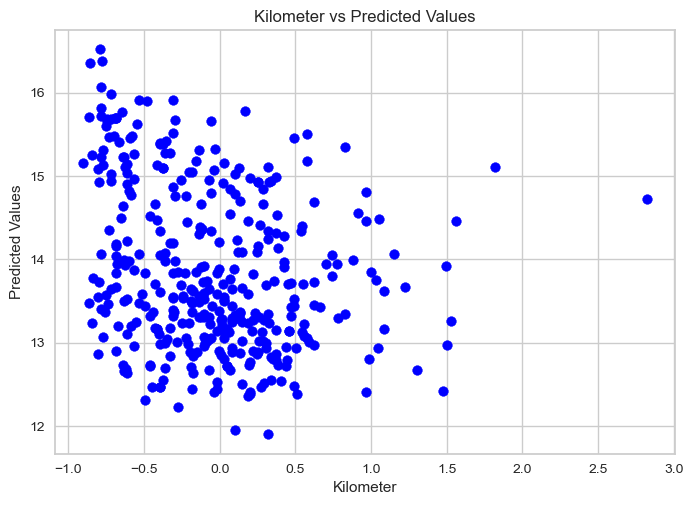

In [41]:
# Scatter plot of Kilometer vs. predicted values
plt.scatter(X_test['Kilometer'], y_pred, color='blue')
plt.xlabel('Kilometer')
plt.ylabel('Predicted Values')
plt.title('Kilometer vs Predicted Values')
plt.show()


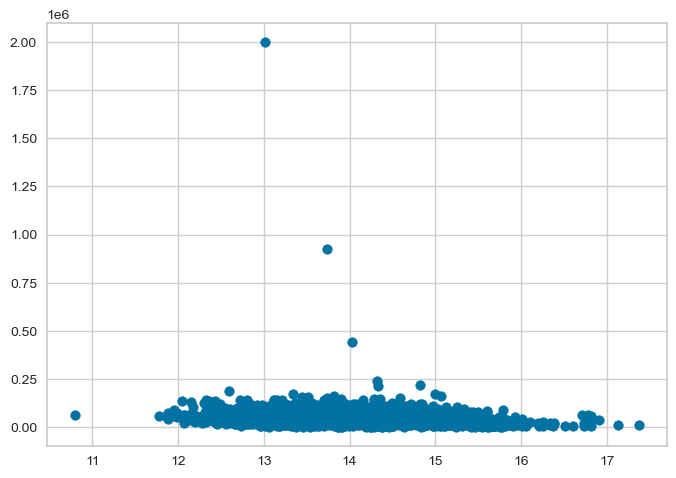

In [42]:
plt.scatter(y, X['Kilometer'])

ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, 'Price' was supplied